In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

raw_edu = pd.read_csv('Education/ACSST5Y2019.S1502-Data.csv', low_memory=False, encoding='iso-8859-1')
raw_popu = pd.read_csv('Education/PEPPOP2019.PEPANNRES-2022-10-17T173751.csv');
raw_inco = pd.read_csv('Income/ACSST1Y2019.S1901-Data.csv', encoding='iso-8859-1');
raw_covid = pd.read_csv('USA_COVID-19.csv', encoding='iso-8859-1')

df_edu = pd.DataFrame()
df_inco = pd.DataFrame()
df_covid = pd.DataFrame()

df_edu["County"] = raw_edu["County"]
df_edu["Education"] = raw_edu["S1502_C01_001E"].to_numpy()/raw_popu["estimate_2019"].to_numpy()
df_inco["County"] = raw_inco["County"]
df_inco["Income"] = raw_inco["S1901_C01_001E"].to_numpy()
df_covid["deaths"] = raw_covid.groupby(["County"]).sum()["deaths"]
df_covid = df_covid.reset_index();

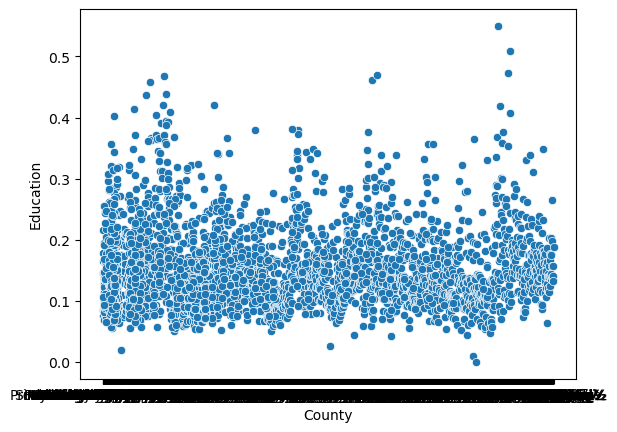

In [2]:
sns.scatterplot(df_edu, x="County", y="Education");

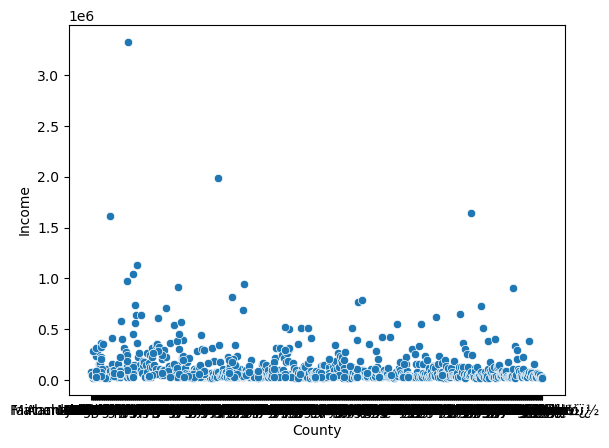

In [3]:
sns.scatterplot(df_inco, x="County", y="Income");

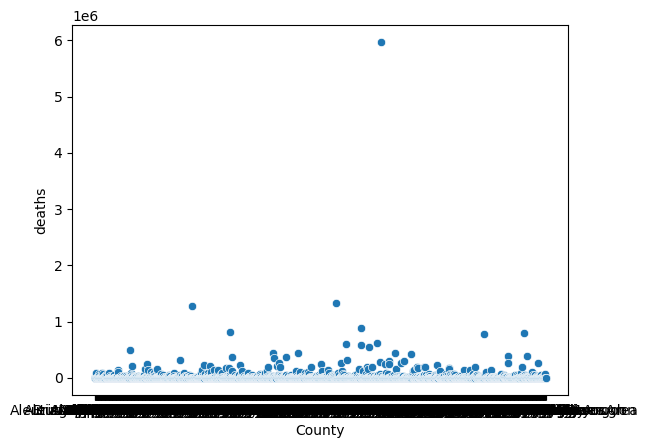

In [5]:
sns.scatterplot(df_covid, x="County", y="deaths");

In [6]:
Inco_county_ls = df_inco["County"].tolist()
test1 = df_edu[df_edu['County'].isin(Inco_county_ls)]
test2 = df_covid[df_covid['County'].isin(Inco_county_ls)]

<div class="alert alert-block alert-info">
<b>Comments: Data were imported for education (2019), household income (2019), and covid deaths (2020). However, each factor includes a different number of counties. For instance: household income is only available for around 900 and COVID data around 1900 out of more than 3000 counties. Some problems were also encountered with formatting the information, e.g., spaces in the data and Latin characters for "Municipios" in Puerto Rico. Before presenting graphs containing more than one variable, the data need to be filtered by finding the overlapping counties among the different factors</b>.
</div>